# Hotel EDA

![Logo](img/hotel-logo.png)

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#import eli5 # https://pypi.org/project/eli5/

#### Loading cleaned dataset

In [3]:
df = pd.read_csv("data/cleaned_dataset.csv", index_col=0, encoding="iso-8859-15")

In [4]:
df.head()

,buchungsdatum,anreisedatum,abreisedatum,naechte_insgesamt,gebuchte_naechte,personen_anzahl,gesamtpreis,saison,buchung_telefon,buchung_online,buchung_reisebuero,zimmerarten,reise_adventure,reise_relax,reise_standard,reise_genuss,kind,entfernung,zahler,kunden_id,buchungsnr,buchungsnr_reisebuero,menue_code,zusatzleistung,destination,anrede,plz,ort,kein_email_ad,kein_brief_ad,kein_anruf_ad,kein_katalog_ad,kein_sms_ad,keine_werbung,kundenclub,sprache_deutsch,jahrgangsalter_klassiert,bundesland,einwohner_adjusted_plz,bev_m_plz,bev_w_plz,bev_insgesamt_ort,bev_weiblich_ort,bev_maennlich_ort,qkm_plz,flaeche_ort,einwohnerdichte_prokm2_plz,haushalte_regiog_2017_plz,kaufkraft_einwohner_in_eur_regio,kk_einwohner_index_regiog_2017,kk_hh_index_regiog_2017,gemeindetyp_regiostar_2016,wirtschaftskraftmr1,wirtschaftskraftmr2
0,2010-01-29,2010-04-02,2010-04-10,8.0,8,2,2982,2010,0,0,1,classic,0,0,0,1,0,535.48,1,1,1151,456,5,5,linz,Herr,29664,Walsrode,0,0,0,0,0,0,0,1,55-64,Niedersachsen,25173,12540,12633,25173,11577,11491,344.326464,344.326464,73.108,11453,20641.89,92.819,98.104,Landregion - Zentrale Stadt,-0.333392,-0.388738
1,2010-01-14,2010-04-05,2010-04-10,5.0,5,2,1437,2010,0,0,1,classic,0,0,1,0,0,544.72,0,2,40,6413,5,5,linz,Frau,50226,Frechen,1,1,1,1,1,1,0,1,55-64,Nordrhein-Westfalen,52473,25645,26828,52473,26828,25645,45.118960,45.118960,1162.992,26227,25268.58,113.623,111.379,Landregion - Zentrale Stadt,0.853802,-0.345112
2,2010-03-01,2010-04-05,2010-04-10,5.0,5,2,1737,2010,0,0,1,classic,0,0,1,0,0,606.63,0,3,2134,4322,5,5,linz,Herr,23970,Wismar,0,0,0,0,0,0,0,1,75-84,Mecklenburg-Vorpommern,1423,692,731,46442,21844,20706,50.563027,83.131346,17.117,6355,18697.65,84.076,73.665,"Stadtregion - Kleinstädtischer, dörflicher Raum",-1.012536,-1.012536
3,2010-01-25,2010-03-21,2010-03-25,4.0,4,2,1047,2010,0,0,1,classic,0,1,0,0,0,421.59,1,4,776,6414,69,9,linz,Frau,15732,Eichwalde,0,0,0,0,0,0,0,1,65-74,Brandenburg,14690,7302,7388,14690,4135,4087,11.965427,11.965427,1227.704,7159,23442.06,105.410,104.087,Landregion - Städtischer Raum,0.417226,0.417226
4,2010-01-26,2010-03-07,2010-03-09,2.0,2,20,5279,2010,0,0,1,classic,1,0,0,0,0,37.88,0,5,813,2938,113,2,duesseldorf,Frau,53881,Euskirchen,0,0,0,0,0,0,1,1,45-54,Nordrhein-Westfalen,28531,13975,14556,57975,29578,28397,127.679129,139.430913,204.625,11683,23328.82,104.901,120.110,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.212335,-0.579173


## New Features

#### Weekday, week and quarter of booking, arrival and departure

also split booking, arrival and departure by year, month and day

In [5]:
df["buchungsdatum"]      = pd.to_datetime(df["buchungsdatum"])
df["wochentag_buchung"]  =  df.buchungsdatum.dt.dayofweek
df["buchungstag"]        = df["buchungsdatum"].dt.day
df["buchungsmonat"]      = df["buchungsdatum"].dt.month
df["buchungsjahr"]       = df["buchungsdatum"].dt.year
df["buchungswoche"]      = df["buchungsdatum"].dt.week
df["buchungsquartal"]    = df["buchungsdatum"].dt.quarter

df["anreisedatum"]       = pd.to_datetime(df["anreisedatum"])
df["wochentag_anreise"]  =  df.anreisedatum.dt.dayofweek
df["anreisetag"]         = df["anreisedatum"].dt.day
df["anreisemonat"]       = df["anreisedatum"].dt.month
df["anreisejahr"]        = df["anreisedatum"].dt.year
df["anreisewoche"]       = df["anreisedatum"].dt.week
df["anreisequartal"]     = df["anreisedatum"].dt.quarter

df["abreisedatum"]       = pd.to_datetime(df["abreisedatum"])
df["wochentag_abreise"]  =  df.abreisedatum.dt.dayofweek
df["abreisetag"]         = df["abreisedatum"].dt.day
df["abreisemonat"]       = df["abreisedatum"].dt.month
df["abreisejahr"]        = df["abreisedatum"].dt.year
df["abreisewoche"]       = df["abreisedatum"].dt.week
df["abreisequartal"]     = df["abreisedatum"].dt.quarter

#### Season (saison)
identifying season start and end month with new feature arrival year (anreisejahr) and depature year (abreisejahr)

In [6]:
print(f"{df.query('saison != anreisejahr').count()[0]} entries for saison are unequal the arrival year")
print(f"{df.query('saison != abreisejahr').count()[0]} entries for saison are unequal the departure year")
print(f"{df.query('saison != anreisejahr and saison != abreisejahr').count()[0]} entries of saison are not equal An- nor Abreisedatum")

print(f"\n{df.query('saison != anreisejahr and saison != abreisejahr and anreisemonat != 1').count()[0]} of these entries are with a different arrival date than January")
print(f"January is counting to the previous saison")

print(f"\n{df.query('anreisejahr > 2018 ').count()[0]} with year of arrival 2019 and higher.")
print(f"{df.query('buchungsjahr > 2018 ').count()[0]} with year of booking 2019 and higher.")

2110 entries for saison are unequal the arrival year
5393 entries for saison are unequal the departure year
2110 entries of saison are not equal An- nor Abreisedatum

0 of these entries are with a different arrival date than January
January is counting to the previous saison

12092 with year of arrival 2019 and higher.
0 with year of booking 2019 and higher.


#### Booking channel
reverse dummy variable

In [7]:
df['buchungskanal'] = 'reisebuero'

mask = df['buchung_telefon'] == 1
df.loc[mask, 'buchungskanal'] = 'Telefon'

mask = df['buchung_online'] == 1
df.loc[mask, 'buchungskanal'] = 'Online'

df.buchungskanal.value_counts()

reisebuero    125138
Telefon        20208
Online         14954
Name: buchungskanal, dtype: int64

#### Advertisment ban
reverse dummy variable

In [8]:
df['werbeban'] = ''

mask = df['kein_email_ad'] == 1
df.loc[mask, 'werbeban'] = 'email, '

mask = df['kein_brief_ad'] == 1
df.loc[mask, 'werbeban'] += 'brief, '

mask = df['kein_anruf_ad'] == 1
df.loc[mask, 'werbeban'] += 'anruf, '

mask = df['kein_katalog_ad'] == 1
df.loc[mask, 'werbeban'] += 'katalog, '

mask = df['kein_sms_ad'] == 1
df.loc[mask, 'werbeban'] += 'sms, '

mask = df['keine_werbung'] == 1
df.loc[mask, 'werbeban'] += 'generell'

df.werbeban = df.werbeban.str.rstrip(', ')

mask = df['werbeban'] == ''
df.loc[mask, 'werbeban'] = 'keine'

df.werbeban.value_counts()

keine                                          129812
email, brief, generell                          11057
email, brief, anruf, sms, generell              10459
email, brief, anruf, katalog, sms, generell      8090
email, brief, anruf, sms                          588
email, anruf, sms                                  85
email                                              59
brief, anruf, sms                                  56
brief                                              48
anruf, sms                                         24
email, anruf, katalog, sms                         14
brief, anruf, katalog, sms                          3
email, katalog                                      2
brief, katalog                                      2
email, brief                                        1
Name: werbeban, dtype: int64

#### Nights stayed (aufenthalt)
check if depature date minus arrival date equals total nights (naechte_insgesamt)

In [9]:
df["aufenthalt"] = (df.abreisedatum - df.anreisedatum).astype('timedelta64[D]').astype('int64')
print(f'{len(df[df.naechte_insgesamt != df.gebuchte_naechte])} rows with different values for naechte_insgesamt and gebuchte_naechte.')
print(f'\n{len(df[df.naechte_insgesamt != df.aufenthalt])} rows with different values for naechte_insgesamt and aufenthalt.')
df.loc[df["naechte_insgesamt"] != df["aufenthalt"], ["naechte_insgesamt", "gebuchte_naechte", "aufenthalt"]].head()

6297 rows with different values for naechte_insgesamt and gebuchte_naechte.

648 rows with different values for naechte_insgesamt and aufenthalt.


,naechte_insgesamt,gebuchte_naechte,aufenthalt
56,3.0,4,4
61,3.0,4,4
65,3.0,4,4
67,4.0,5,5
69,3.0,4,4


replace missing values and  naechte_insgesamt > aufenthalt by aufenthalt

In [10]:
mask = df[df.naechte_insgesamt != df.aufenthalt]
df.loc[mask.index, "naechte_insgesamt"] = df.loc[mask.index, "aufenthalt"]

#### Nights in total (naechte_insgesamt)
filling the NaN from values of aufenthalt
and transfort naechte_insgesamt to integer

In [11]:
rows = df.loc[pd.isna(df.naechte_insgesamt)]
print(f"\n{len(rows)} entry with NaN for naechte_insgesamt.")

df["naechte_insgesamt"].fillna(df["aufenthalt"], inplace=True)

print(f"\n{df.naechte_insgesamt.apply(type).value_counts()}\n")
df.naechte_insgesamt = df.naechte_insgesamt.astype("int64")

rows = df.query('naechte_insgesamt > 22 or naechte_insgesamt == 0')
print(f"\n{len(rows)} rows with 0 or more than 22 nights in total dropped")
df.drop(rows.index, inplace=True)


0 entry with NaN for naechte_insgesamt.

<class 'float'>    160300
Name: naechte_insgesamt, dtype: int64


41 rows with 0 or more than 22 nights in total dropped


#### Nights out of hotel (naechte_ausserhalb)
naechte_insgesamt - gebuchte_naechte

In [12]:
df["naechte_ausserhalb"] = df.naechte_insgesamt - df.gebuchte_naechte
print(f"{df.naechte_ausserhalb.value_counts(dropna=False)}")
rows = df.query("naechte_ausserhalb < 0")
print(f"\n{len(rows)} nights out of hotel smaller 0 dropped.")
df.drop(rows.index, inplace=True)

0     154498
1       3987
2        899
3        548
4        105
7         79
5         58
6         24
10        16
9         13
14         9
8          8
11         8
12         3
13         2
15         1
16         1
Name: naechte_ausserhalb, dtype: int64

0 nights out of hotel smaller 0 dropped.


In [13]:
rows = df.query("naechte_ausserhalb < 0")
print(f"\n{len(rows)} naechte_ausserhalb smaller 0 dropped.")
df.drop(rows.index, inplace=True)


0 naechte_ausserhalb smaller 0 dropped.


#### Amount of bookings (anz_buch)

#### Lead time (Buchungsvorlauf)
how long in advance do the client book their room(s)?

In [14]:
df["buchungs_vorlauf"] = (df.anreisedatum - df.buchungsdatum).astype('timedelta64[D]').astype('int64')
df.buchungs_vorlauf.value_counts().head()

74    858
60    844
66    833
68    833
61    815
Name: buchungs_vorlauf, dtype: int64

#### ADR (average daily rate)
based on all bookings for a day for one property divided by booked rooms

In [15]:
# ändern
# zweites df mit jedem tag als reihe, spalte pro destination
# muss ich eventuell df jede buchung aufsplitten auf jeden einzelnen tag?

#### Price per Person

In [16]:
df["preis_per"] = round(df.gesamtpreis / df.personen_anzahl,2)

#### Price per day (for the booking)

In [17]:
df["preis_nacht"] = round(df.gesamtpreis / df.gebuchte_naechte,2)

#### Price per Day per person  (for the booking)

In [18]:
df["preis_nacht_per"] = round(df.preis_nacht / df.personen_anzahl,2)

#### Row correspondant to the booking number
(Rows not rooms, since we got could have two rows for a double bed room booking as well as for two single bed room booking)

In [19]:
tmp = df["buchungsnr"].value_counts().to_frame()
df["buch_zeilen"] = df["buchungsnr"].map(tmp.set_index(tmp.index)["buchungsnr"])
df[["buchungsnr", "buch_zeilen", "personen_anzahl"]].sort_values(by=["buchungsnr"]).head(10)

,buchungsnr,buch_zeilen,personen_anzahl
67341,1,2,2
11487,1,2,2
10158,3,2,2
118740,3,2,2
53856,4,2,2
60714,4,2,2
105426,5,3,11
136357,5,3,11
142836,5,3,11
5387,7,2,2


check if the rows are corresponding to the amount of guests

 0     83358
-1     56111
-2     10888
-3      4299
-4      1971
-5      1007
-6       595
-7       400
-8       267
-9       239
-10      186
-24       93
-11       89
-14       88
-21       86
-13       85
-27       84
-17       82
-15       70
-12       62
-18       50
-25       21
-28       15
-30       14
-54       12
-22       11
-23       11
-51       10
-20       10
-32        9
-52        8
-43        7
-34        6
-45        5
-56        5
-31        4
-35        1
Name: Diff, dtype: int64

76901 rows with negative difference.
This corresponds to 47.99 percent


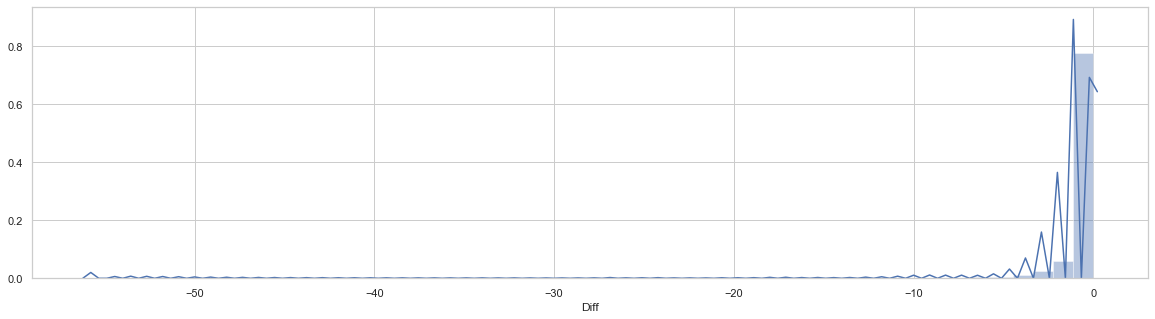

In [20]:
df["Diff"] = df.buch_zeilen - df.personen_anzahl
print(f"{df['Diff'].value_counts(dropna=False)}")

print(f"\n{df.query('Diff < 0').count()[0]} rows with negative difference.")
print(f"This corresponds to {round(df.query('Diff < 0').count()[0]/df.shape[0]*100,2)} percent")
# should drop all rows with difference between those to columns

plt.figure(figsize=(20,5))
sns.distplot(df.Diff);

In [21]:
res = df.query("Diff < 0 and destination == 'linz'")
print(f"\n{len(res)} rows with negative difference für destination Linz.")

res = df.query("Diff < 0 and destination == 'duesseldorf'")
print(f"\n{len(res)} rows with negative difference für destination Duesseldorf.")

res = df.query("Diff < 0 and destination == 'saint etienne'")
print(f"\n{len(res)} rows with negative difference für destination Saint Etienne.")

res = df.query("Diff < 0 and destination == 'chalons-sur-marne'")
print(f"\n{len(res)} rows with negative difference für destination Chalons-Sur-Marne.")

res = df.query("Diff < 0 and destination == 'viana do castelo'")
print(f"\n{len(res)} rows with negative difference für destination Viana do Castelo.")

df.drop("Diff", axis=1, inplace=True)


37201 rows with negative difference für destination Linz.

30658 rows with negative difference für destination Duesseldorf.

7283 rows with negative difference für destination Saint Etienne.

1419 rows with negative difference für destination Chalons-Sur-Marne.

340 rows with negative difference für destination Viana do Castelo.


#### Initial booking
first booking by each client id

In [22]:
df.loc[df.groupby(['kunden_id'])['buchungsdatum'].idxmin(),'erst_buchung'] = 1
df.erst_buchung.fillna(0, inplace=True) 
df.erst_buchung.value_counts()

1.0    129462
0.0     30797
Name: erst_buchung, dtype: int64

#### Follow-up booking (folgebuchung)

In [23]:
df.loc[df.groupby(['kunden_id'])['buchungsdatum'].idxmin(),'folgebuchung'] = 0
df.folgebuchung.fillna(1, inplace=True) 
df.folgebuchung.value_counts()

0.0    129462
1.0     30797
Name: folgebuchung, dtype: int64

#### Repeater
guests who have more than one booking (flagged at every booking)

In [24]:
df['repeater'] = df['kunden_id'].duplicated(keep=False)
df.repeater.value_counts(dropna=False)

False    110712
True      49547
Name: repeater, dtype: int64

In [25]:
df.head()

,buchungsdatum,anreisedatum,abreisedatum,naechte_insgesamt,gebuchte_naechte,personen_anzahl,gesamtpreis,saison,buchung_telefon,buchung_online,buchung_reisebuero,zimmerarten,reise_adventure,reise_relax,reise_standard,reise_genuss,kind,entfernung,zahler,kunden_id,buchungsnr,buchungsnr_reisebuero,menue_code,zusatzleistung,destination,anrede,plz,ort,kein_email_ad,kein_brief_ad,kein_anruf_ad,kein_katalog_ad,kein_sms_ad,keine_werbung,kundenclub,sprache_deutsch,jahrgangsalter_klassiert,bundesland,einwohner_adjusted_plz,bev_m_plz,bev_w_plz,bev_insgesamt_ort,bev_weiblich_ort,bev_maennlich_ort,qkm_plz,flaeche_ort,einwohnerdichte_prokm2_plz,haushalte_regiog_2017_plz,kaufkraft_einwohner_in_eur_regio,kk_einwohner_index_regiog_2017,kk_hh_index_regiog_2017,gemeindetyp_regiostar_2016,wirtschaftskraftmr1,wirtschaftskraftmr2,wochentag_buchung,buchungstag,buchungsmonat,buchungsjahr,buchungswoche,buchungsquartal,wochentag_anreise,anreisetag,anreisemonat,anreisejahr,anreisewoche,anreisequartal,wochentag_abreise,abreisetag,abreisemonat,abreisejahr,abreisewoche,abreisequartal,buchungskanal,werbeban,aufenthalt,naechte_ausserhalb,buchungs_vorlauf,preis_per,preis_nacht,preis_nacht_per,buch_zeilen,erst_buchung,folgebuchung,repeater
0,2010-01-29,2010-04-02,2010-04-10,8,8,2,2982,2010,0,0,1,classic,0,0,0,1,0,535.48,1,1,1151,456,5,5,linz,Herr,29664,Walsrode,0,0,0,0,0,0,0,1,55-64,Niedersachsen,25173,12540,12633,25173,11577,11491,344.326464,344.326464,73.108,11453,20641.89,92.819,98.104,Landregion - Zentrale Stadt,-0.333392,-0.388738,4,29,1,2010,4,1,4,2,4,2010,13,2,5,10,4,2010,14,2,reisebuero,keine,8,0,63,1491.00,372.75,186.38,2,1.0,0.0,False
1,2010-01-14,2010-04-05,2010-04-10,5,5,2,1437,2010,0,0,1,classic,0,0,1,0,0,544.72,0,2,40,6413,5,5,linz,Frau,50226,Frechen,1,1,1,1,1,1,0,1,55-64,Nordrhein-Westfalen,52473,25645,26828,52473,26828,25645,45.118960,45.118960,1162.992,26227,25268.58,113.623,111.379,Landregion - Zentrale Stadt,0.853802,-0.345112,3,14,1,2010,2,1,0,5,4,2010,14,2,5,10,4,2010,14,2,reisebuero,"email, brief, anruf, katalog, sms, generell",5,0,81,718.50,287.40,143.70,2,1.0,0.0,False
2,2010-03-01,2010-04-05,2010-04-10,5,5,2,1737,2010,0,0,1,classic,0,0,1,0,0,606.63,0,3,2134,4322,5,5,linz,Herr,23970,Wismar,0,0,0,0,0,0,0,1,75-84,Mecklenburg-Vorpommern,1423,692,731,46442,21844,20706,50.563027,83.131346,17.117,6355,18697.65,84.076,73.665,"Stadtregion - Kleinstädtischer, dörflicher Raum",-1.012536,-1.012536,0,1,3,2010,9,1,0,5,4,2010,14,2,5,10,4,2010,14,2,reisebuero,keine,5,0,35,868.50,347.40,173.70,1,1.0,0.0,False
3,2010-01-25,2010-03-21,2010-03-25,4,4,2,1047,2010,0,0,1,classic,0,1,0,0,0,421.59,1,4,776,6414,69,9,linz,Frau,15732,Eichwalde,0,0,0,0,0,0,0,1,65-74,Brandenburg,14690,7302,7388,14690,4135,4087,11.965427,11.965427,1227.704,7159,23442.06,105.410,104.087,Landregion - Städtischer Raum,0.417226,0.417226,0,25,1,2010,4,1,6,21,3,2010,11,1,3,25,3,2010,12,1,reisebuero,keine,4,0,55,523.50,261.75,130.88,1,1.0,0.0,False
4,2010-01-26,2010-03-07,2010-03-09,2,2,20,5279,2010,0,0,1,classic,1,0,0,0,0,37.88,0,5,813,2938,113,2,duesseldorf,Frau,53881,Euskirchen,0,0,0,0,0,0,1,1,45-54,Nordrhein-Westfalen,28531,13975,14556,57975,29578,28397,127.679129,139.430913,204.625,11683,23328.82,104.901,120.110,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.212335,-0.579173,1,26,1,2010,4,1,6,7,3,2010,9,1,1,9,3,2010,10,1,reisebuero,keine,2,0,40,263.95,2639.50,131.98,7,1.0,0.0,True


# Data Exploration

In [26]:
col_list = ["saison", "buchung_telefon", "buchung_online", "buchung_reisebuero",
            "reise_adventure", "reise_relax", "reise_standard", "reise_genuss", "kind", "zahler",
            "kunden_id", "buchungsnr", "buchungsnr_reisebuero", "menue_code", "zusatzleistung",
            "plz", "kein_email_ad", "kein_brief_ad", "kein_anruf_ad", "kein_katalog_ad", "kein_sms_ad", 
            "keine_werbung", "kundenclub", "sprache_deutsch", "erst_buchung", "folgebuchung"]

In [33]:
#frozen cell
statistics = round(df.describe(),2).T
statistics.drop("count", axis=1, inplace=True)
statistics.drop(col_list, axis=0, inplace=True)

pd.set_option("display.max_rows", None)
statistics

,mean,std,min,25%,50%,75%,max
naechte_insgesamt,6.08,2.24,1.00,4.00,7.00,7.00,22.00
gebuchte_naechte,6.02,2.17,1.00,4.00,7.00,7.00,21.00
personen_anzahl,3.31,4.06,1.00,2.00,2.00,4.00,77.00
gesamtpreis,4977.87,4228.59,120.00,2247.00,4052.00,6147.00,68686.00
entfernung,371.93,248.82,0.67,188.00,368.28,515.26,2140.60
einwohner_adjusted_plz,19196.66,11428.81,108.00,10661.00,18122.00,25598.00,65440.00
bev_m_plz,9420.72,5588.98,53.00,5233.00,8877.00,12548.00,32685.00
bev_w_plz,9775.94,5844.40,55.00,5399.00,9276.00,13074.00,32755.00
bev_insgesamt_ort,179590.61,368391.51,135.00,11600.00,32171.00,132366.00,1860977.00
bev_weiblich_ort,156890.27,375831.90,123.00,5761.00,17334.00,91910.00,1852025.00


In [ ]:
# set back to default
pd.set_option("display.max_rows", 10)

### Data Distribution
by sex

Frau     86688
Herr     73500
Firma       71
Name: anrede, dtype: int64


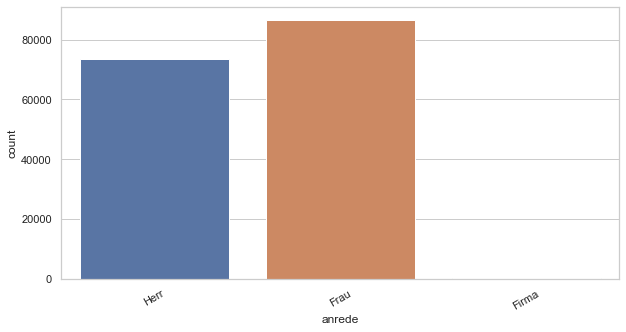

In [27]:
print(df.anrede.value_counts(dropna=False))
plt.figure(figsize=(10,5))
ax = sns.countplot(x="anrede", data=df)
ax.set_xticklabels(labels=df.anrede.unique(), rotation=30);

#### booking channel

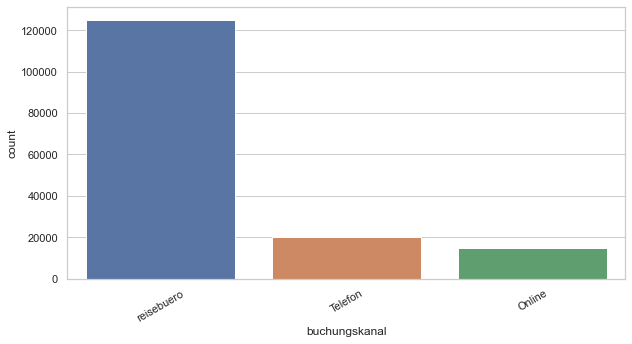

In [28]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="buchungskanal", data=df)
ax.set_xticklabels(labels=df.buchungskanal.unique(), rotation=30);

#### room caterory

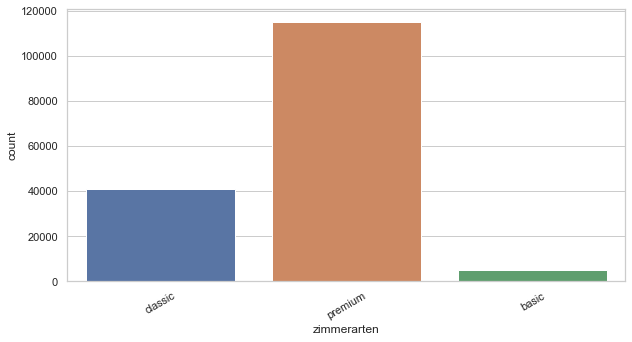

In [29]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="zimmerarten", data=df)
ax.set_xticklabels(labels=df.zimmerarten.unique(), rotation=30);

## Age groups

Total nights and title

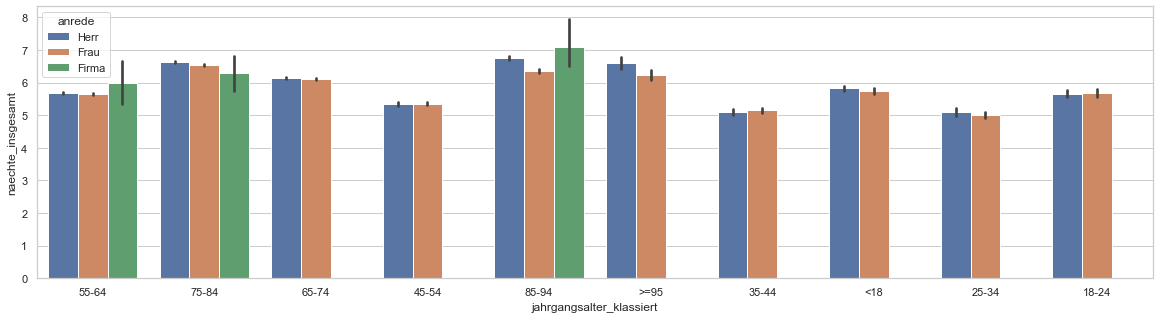

In [30]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="naechte_insgesamt", hue="anrede", data=df)

Total price and room category

premium    114866
classic     40641
basic        4752
Name: zimmerarten, dtype: int64


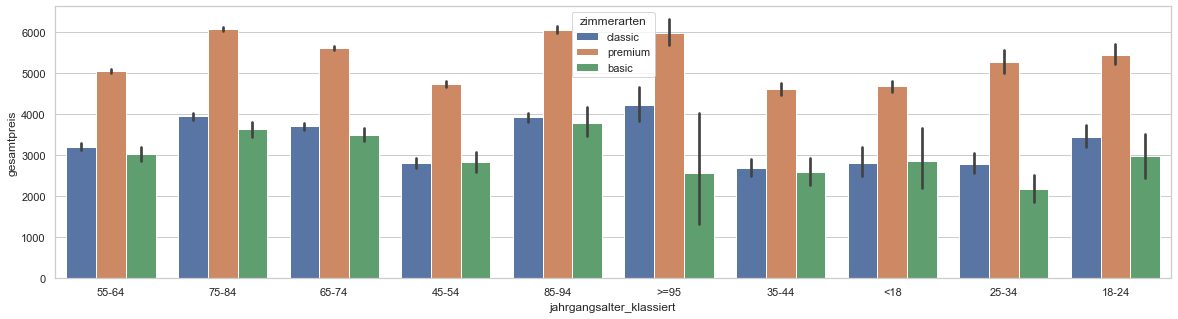

In [31]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="gesamtpreis", hue="zimmerarten", data=df)

Lead time

premium    114866
classic     40641
basic        4752
Name: zimmerarten, dtype: int64


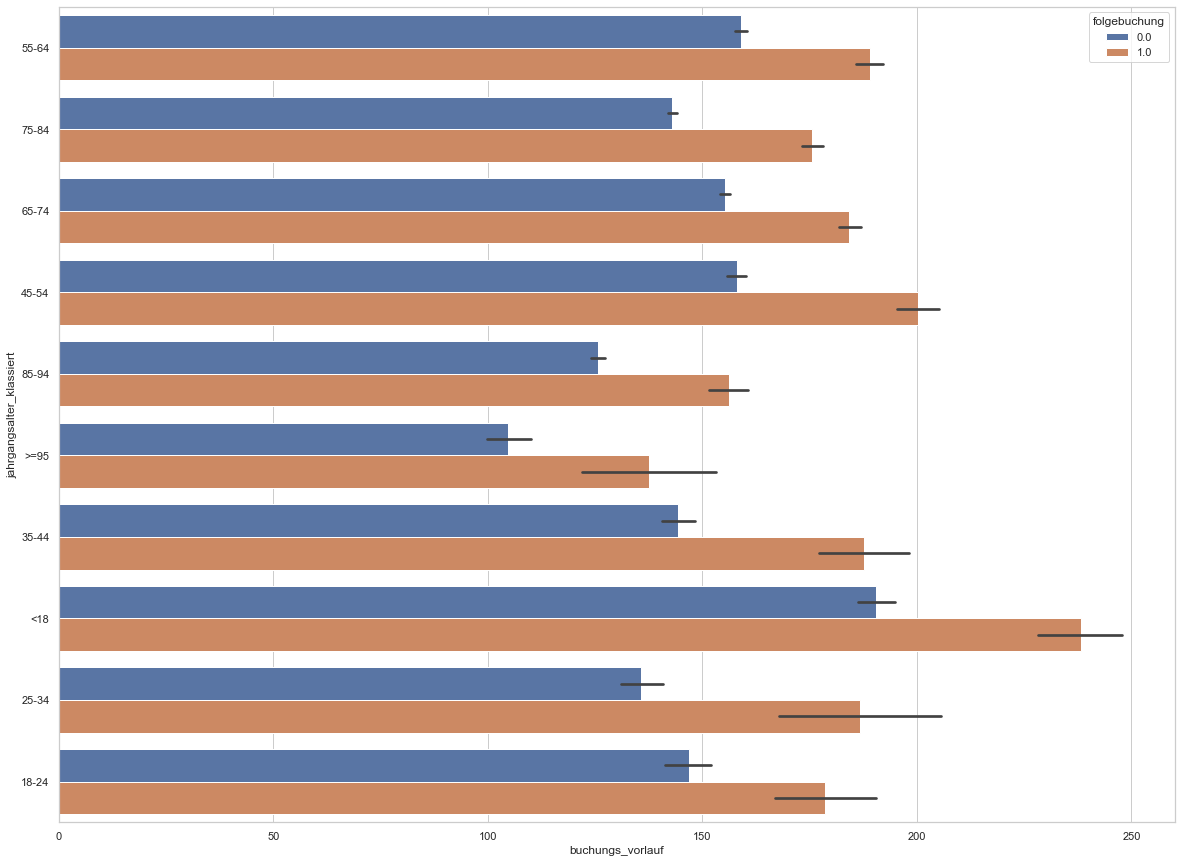

In [32]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,15))
ax = sns.barplot(x="buchungs_vorlauf", y="jahrgangsalter_klassiert", hue="folgebuchung", data=df)

Followup bookings

premium    114866
classic     40641
basic        4752
Name: zimmerarten, dtype: int64


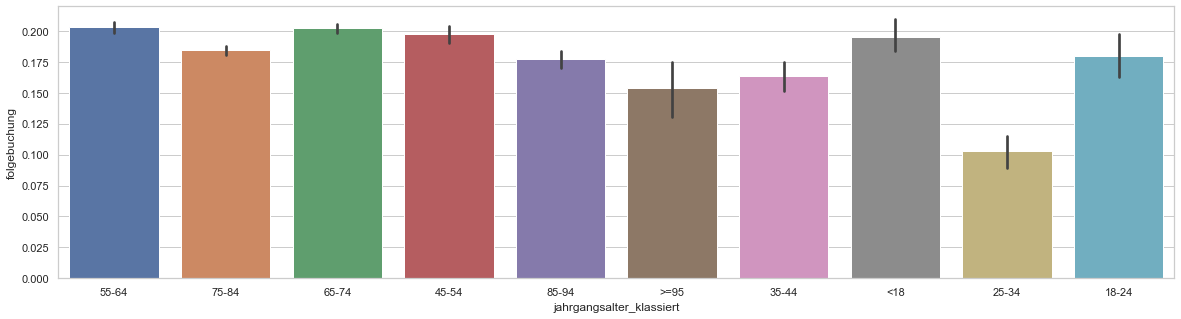

In [33]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="folgebuchung", data=df)

Club members

premium    114866
classic     40641
basic        4752
Name: zimmerarten, dtype: int64


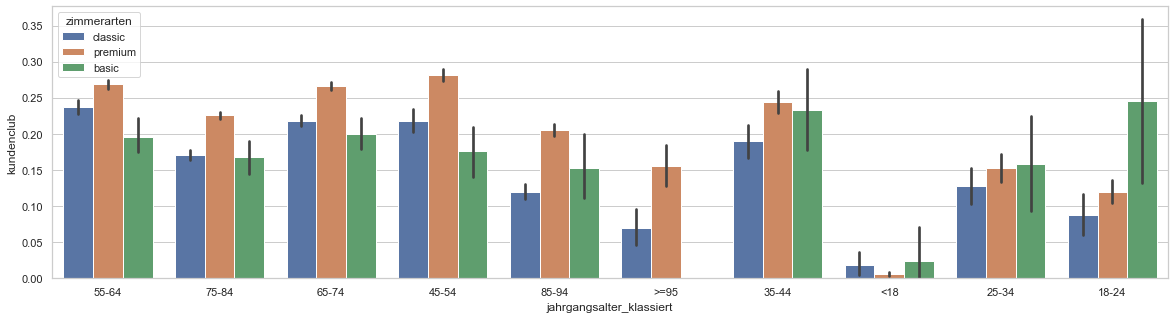

In [34]:
print(df.zimmerarten.value_counts())
plt.figure(figsize=(20,5))
ax = sns.barplot(x="jahrgangsalter_klassiert", y="kundenclub", hue="zimmerarten", data=df)

## by Destination

#### Bookings

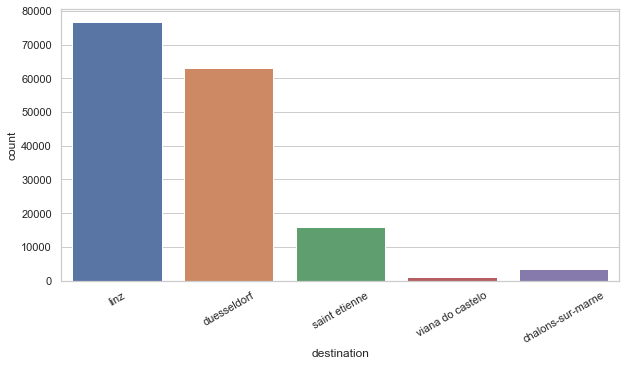

In [35]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="destination", data=df)
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

####  followup bookings
in total

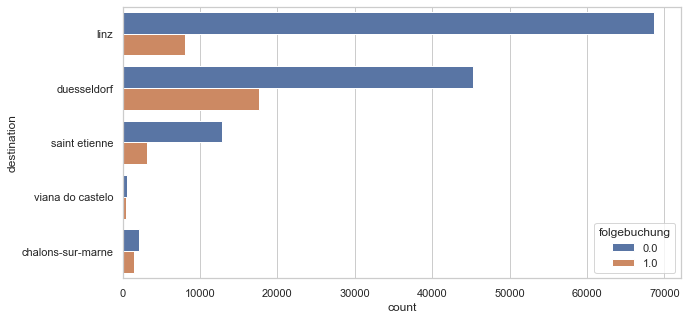

In [36]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="destination", hue="folgebuchung", data=df)

in relation

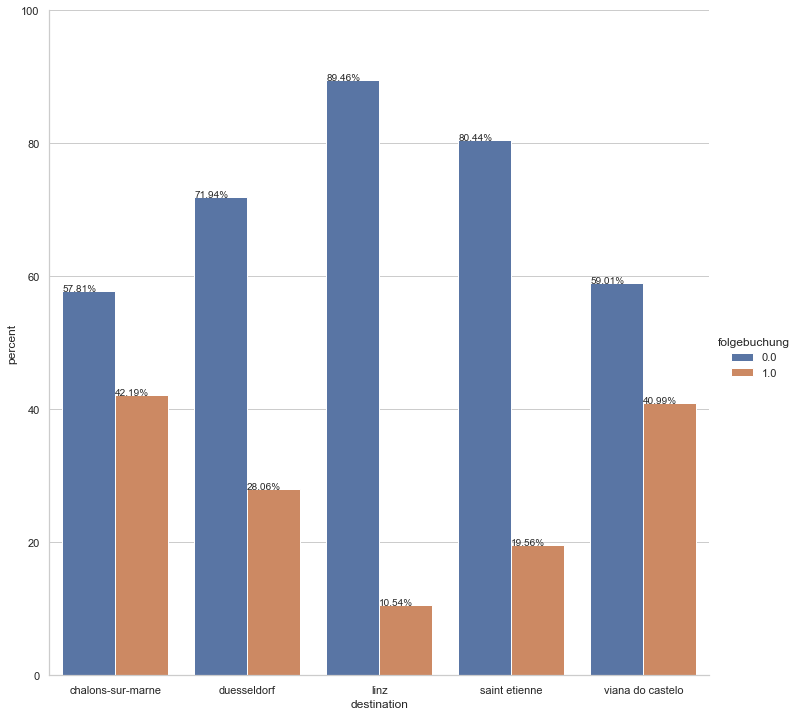

In [37]:
x,y = 'destination', 'folgebuchung'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Club member
in total

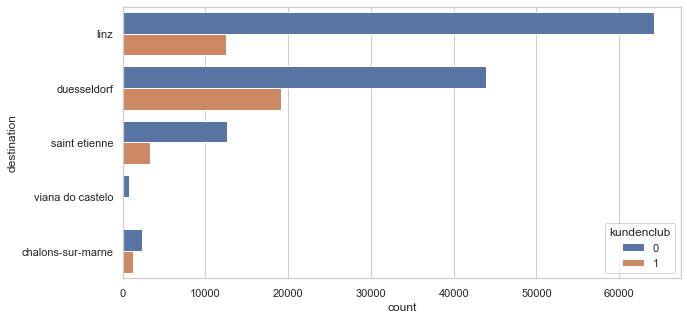

In [38]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="destination", hue="kundenclub", data=df)

in relation

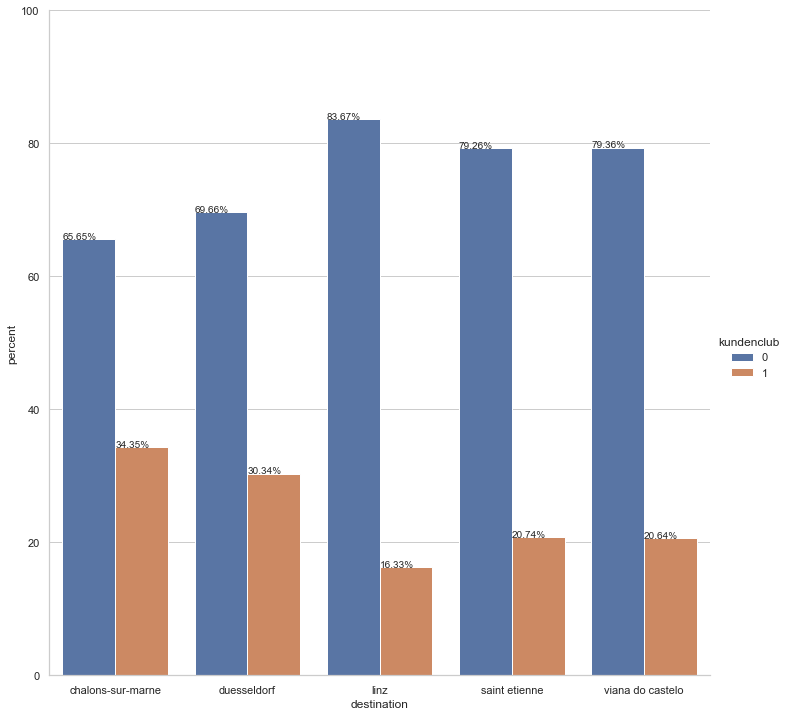

In [39]:
x,y = 'destination', 'kundenclub'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### lead time

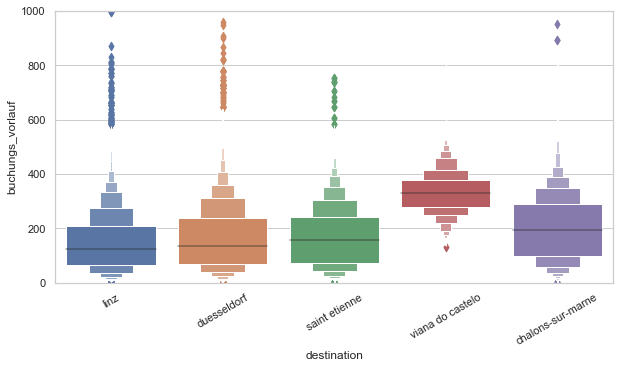

In [40]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "buchungs_vorlauf", data=df)
ax.set(ylim=(0, 1_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### length of stay

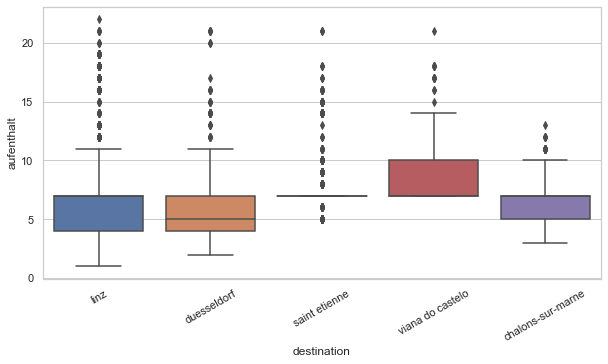

In [41]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="destination", y= "aufenthalt", data=df)
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### total amount paid

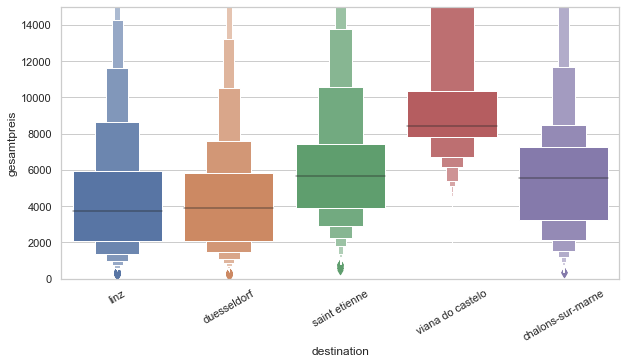

In [42]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "gesamtpreis", data=df)
ax.set(ylim=(0, 15_000));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

#### total distance

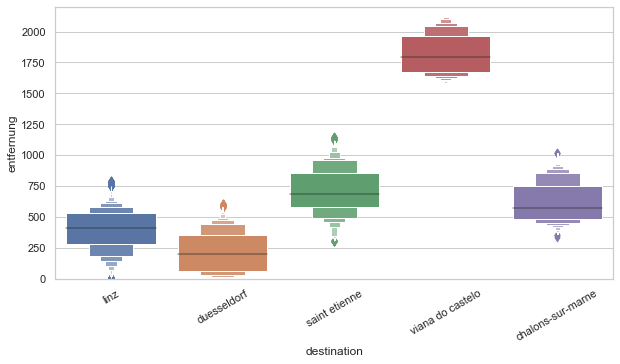

In [43]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="destination", y= "entfernung", data=df)
ax.set(ylim=(0, 2_200));
ax.set_xticklabels(labels=df.destination.unique(), rotation=30);

## Followup bookings

#### Followup bookings and advertising allowance
- Many non repeater without a ban for any advertising channel, maybe not tracked correctly?
- Most guests chose more than one channel from which they did not want to receive advertising.
- Even most of the repeater prefer no advertising

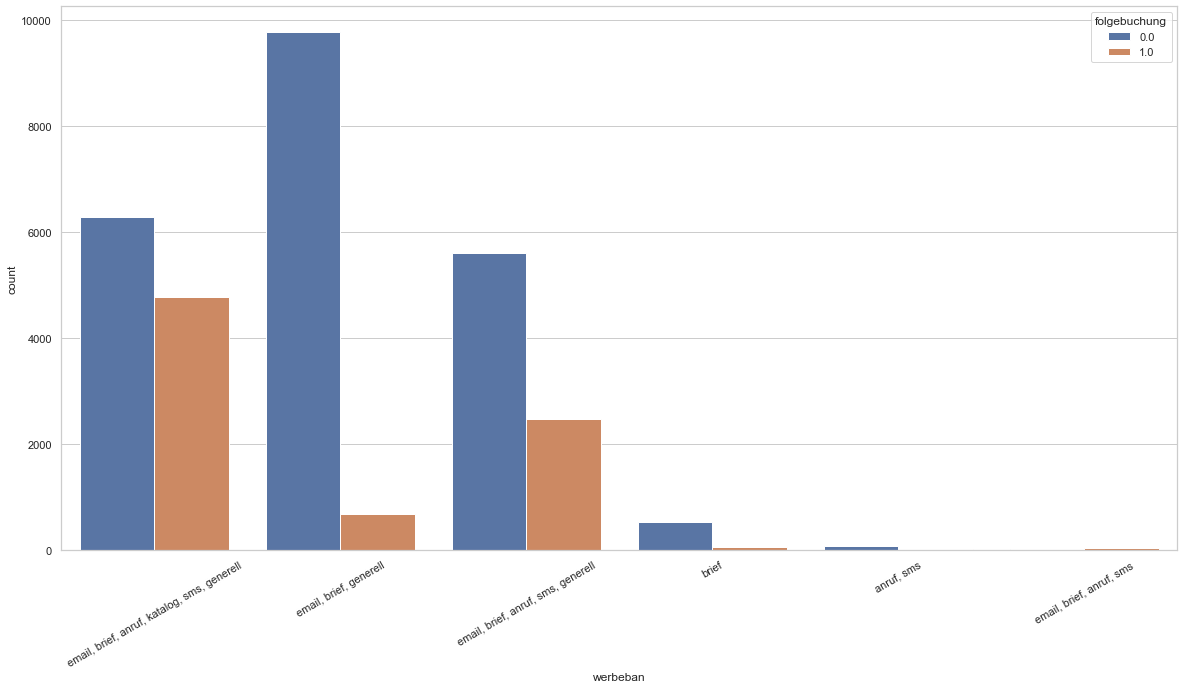

In [44]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="werbeban", hue="folgebuchung", data=df, order=df.werbeban.value_counts().iloc[1:7].index)
ax.set_xticklabels(labels=df.werbeban.unique()[1:7], rotation=30);

#### club member
do they become club member or is every booking from a repeating guest flagged the same?

In [45]:
df.loc[df["repeater"] == 1].head()

,buchungsdatum,anreisedatum,abreisedatum,naechte_insgesamt,gebuchte_naechte,personen_anzahl,gesamtpreis,saison,buchung_telefon,buchung_online,buchung_reisebuero,zimmerarten,reise_adventure,reise_relax,reise_standard,reise_genuss,kind,entfernung,zahler,kunden_id,buchungsnr,buchungsnr_reisebuero,menue_code,zusatzleistung,destination,anrede,plz,ort,kein_email_ad,kein_brief_ad,kein_anruf_ad,kein_katalog_ad,kein_sms_ad,keine_werbung,kundenclub,sprache_deutsch,jahrgangsalter_klassiert,bundesland,einwohner_adjusted_plz,bev_m_plz,bev_w_plz,bev_insgesamt_ort,bev_weiblich_ort,bev_maennlich_ort,qkm_plz,flaeche_ort,einwohnerdichte_prokm2_plz,haushalte_regiog_2017_plz,kaufkraft_einwohner_in_eur_regio,kk_einwohner_index_regiog_2017,kk_hh_index_regiog_2017,gemeindetyp_regiostar_2016,wirtschaftskraftmr1,wirtschaftskraftmr2,wochentag_buchung,buchungstag,buchungsmonat,buchungsjahr,buchungswoche,buchungsquartal,wochentag_anreise,anreisetag,anreisemonat,anreisejahr,anreisewoche,anreisequartal,wochentag_abreise,abreisetag,abreisemonat,abreisejahr,abreisewoche,abreisequartal,buchungskanal,werbeban,aufenthalt,naechte_ausserhalb,buchungs_vorlauf,preis_per,preis_nacht,preis_nacht_per,buch_zeilen,erst_buchung,folgebuchung,repeater
4,2010-01-26,2010-03-07,2010-03-09,2,2,20,5279,2010,0,0,1,classic,1,0,0,0,0,37.88,0,5,813,2938,113,2,duesseldorf,Frau,53881,Euskirchen,0,0,0,0,0,0,1,1,45-54,Nordrhein-Westfalen,28531,13975,14556,57975,29578,28397,127.679129,139.430913,204.625,11683,23328.82,104.901,120.110,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.212335,-0.579173,1,26,1,2010,4,1,6,7,3,2010,9,1,1,9,3,2010,10,1,reisebuero,keine,2,0,40,263.95,2639.50,131.98,7,1.0,0.0,True
5,2014-10-22,2015-10-17,2015-10-22,5,5,3,1943,2015,1,0,0,premium,0,0,1,0,0,37.88,1,5,59790,8316,187,12,duesseldorf,Frau,53881,Euskirchen,0,0,0,0,0,0,1,1,45-54,Nordrhein-Westfalen,28531,13975,14556,57975,29578,28397,127.679129,139.430913,204.625,11683,23328.82,104.901,120.110,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.212335,-0.579173,2,22,10,2014,43,4,5,17,10,2015,42,4,3,22,10,2015,43,4,Telefon,keine,5,0,360,647.67,388.60,129.53,2,0.0,1.0,True
15,2011-10-22,2011-10-30,2011-11-03,4,4,2,1107,2011,0,0,1,classic,0,1,0,0,0,255.29,0,13,20974,6614,80,12,duesseldorf,Frau,76532,Baden-Baden,0,0,0,0,0,0,0,1,55-64,Baden-Württemberg,23099,11080,12019,55123,28681,26442,37.429391,140.363257,164.566,12113,24650.22,110.843,107.984,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.927917,0.078171,5,22,10,2011,42,4,6,30,10,2011,43,4,3,3,11,2011,44,4,reisebuero,keine,4,0,8,553.50,276.75,138.38,1,1.0,0.0,True
16,2011-11-25,2011-12-03,2011-12-07,4,4,2,987,2011,0,0,1,classic,0,1,0,0,0,389.37,0,13,22132,6614,221,5,linz,Frau,76532,Baden-Baden,0,0,0,0,0,0,0,1,55-64,Baden-Württemberg,23099,11080,12019,55123,28681,26442,37.429391,140.363257,164.566,12113,24650.22,110.843,107.984,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.927917,0.078171,4,25,11,2011,47,4,5,3,12,2011,48,4,2,7,12,2011,49,4,reisebuero,keine,4,0,8,493.50,246.75,123.38,1,0.0,1.0,True
17,2012-12-07,2012-12-19,2012-12-23,4,4,2,897,2012,0,0,1,classic,0,1,0,0,0,389.37,0,13,31887,6614,221,5,linz,Frau,76532,Baden-Baden,0,0,0,0,0,0,0,1,55-64,Baden-Württemberg,23099,11080,12019,55123,28681,26442,37.429391,140.363257,164.566,12113,24650.22,110.843,107.984,"Stadtregion - Kleinstädtischer, dörflicher Raum",0.927917,0.078171,4,7,12,2012,49,4,2,19,12,2012,51,4,6,23,12,2012,51,4,reisebuero,keine,4,0,12,448.50,224.25,112.12,1,0.0,1.0,True


#### club member and followup bookings
strong predictor

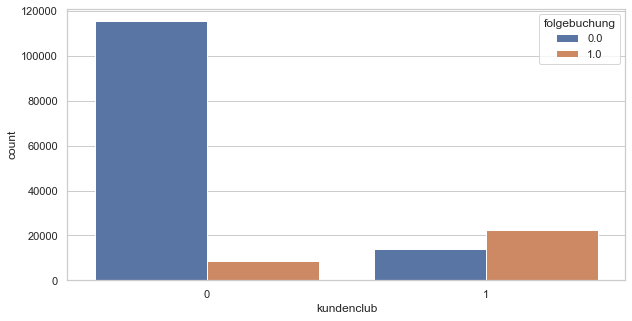

In [46]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="kundenclub", hue="folgebuchung", data=df)

#### booking channel and followup bookings
absolute

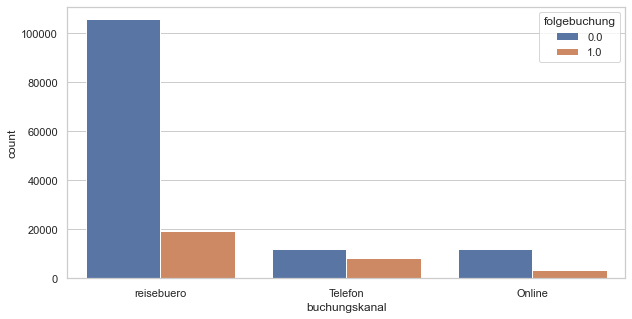

In [47]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="buchungskanal", hue="folgebuchung", data=df)

relative

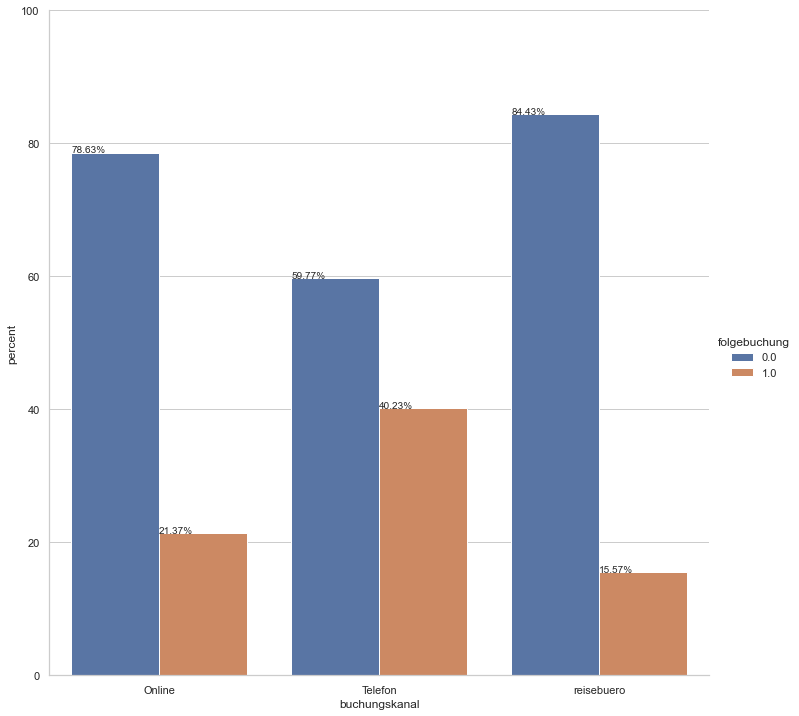

In [48]:
x,y = 'buchungskanal', 'folgebuchung'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### repeater booking more than one location

In [49]:
# ändern
# wenn kunden_id mehrfach und in rows stehen für destination verschiedene werte

#### Season

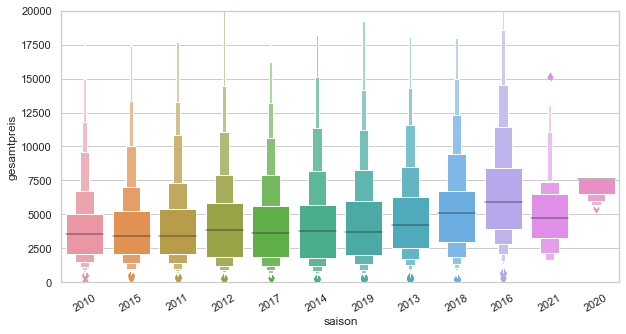

In [50]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="saison", y= "gesamtpreis", data=df)
ax.set(ylim=(0, 20_000));
ax.set_xticklabels(labels=df.saison.unique(), rotation=30);

#### room categories

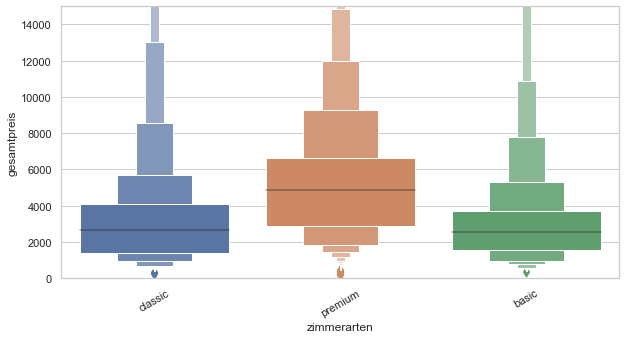

In [51]:
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="zimmerarten", y= "gesamtpreis", data=df)
ax.set(ylim=(0, 15_000));
ax.set_xticklabels(labels=df.zimmerarten.unique(), rotation=30);

#### Ort

In [52]:
df.ort.value_counts().head(10) 
#ändern je destination grafisch

Berlin        5679
Köln          3721
Hamburg       3259
München       2713
Essen         1235
Düsseldorf    1188
Frankfurt     1148
Dortmund      1127
Hannover      1070
Wuppertal     1033
Name: ort, dtype: int64

obsolete when dropping Country

In [53]:
''' 
# continent (Kontinent)
with open("data\kontinent_dict.txt") as f:
    kontinent_dict = dict(x.rstrip().split(None, 1) for x in f)

# source: https://www.vhu-software.de/Download/Infodokumente/Laenderkennzeichen.pdf

df.kontinent.replace(kontinent_dict, inplace=True)


# Country
print(f"Country Distribution in percent:\n{round(df.lkz.value_counts(normalize=True).head(5),4)*100}")
del tmp
tmp = df.query("lkz != 'DE'")["lkz"].value_counts().head(15)
print(f"\nTop 15 Countries (without Germany):\n{tmp}")

# Continent (Distribution in percentage)
print(round(df.kontinent.value_counts(normalize=True),4)*100)

# Speaking German
print(round(df.sprache_deutsch.value_counts(normalize=True),4)*100)

'''

' \n# continent (Kontinent)\nwith open("data\\kontinent_dict.txt") as f:\n    kontinent_dict = dict(x.rstrip().split(None, 1) for x in f)\n\n# source: https://www.vhu-software.de/Download/Infodokumente/Laenderkennzeichen.pdf\n\ndf.kontinent.replace(kontinent_dict, inplace=True)\n\n\n# Country\nprint(f"Country Distribution in percent:\n{round(df.lkz.value_counts(normalize=True).head(5),4)*100}")\ndel tmp\ntmp = df.query("lkz != \'DE\'")["lkz"].value_counts().head(15)\nprint(f"\nTop 15 Countries (without Germany):\n{tmp}")\n\n# Continent (Distribution in percentage)\nprint(round(df.kontinent.value_counts(normalize=True),4)*100)\n\n# Speaking German\nprint(round(df.sprache_deutsch.value_counts(normalize=True),4)*100)\n\n'

### Outliers

In [54]:
#gesamtpreis "personen_anzahl", "preis_per", "preis_nacht", "preis_nacht_per", "naechte_ausserhalb",

### Histograms

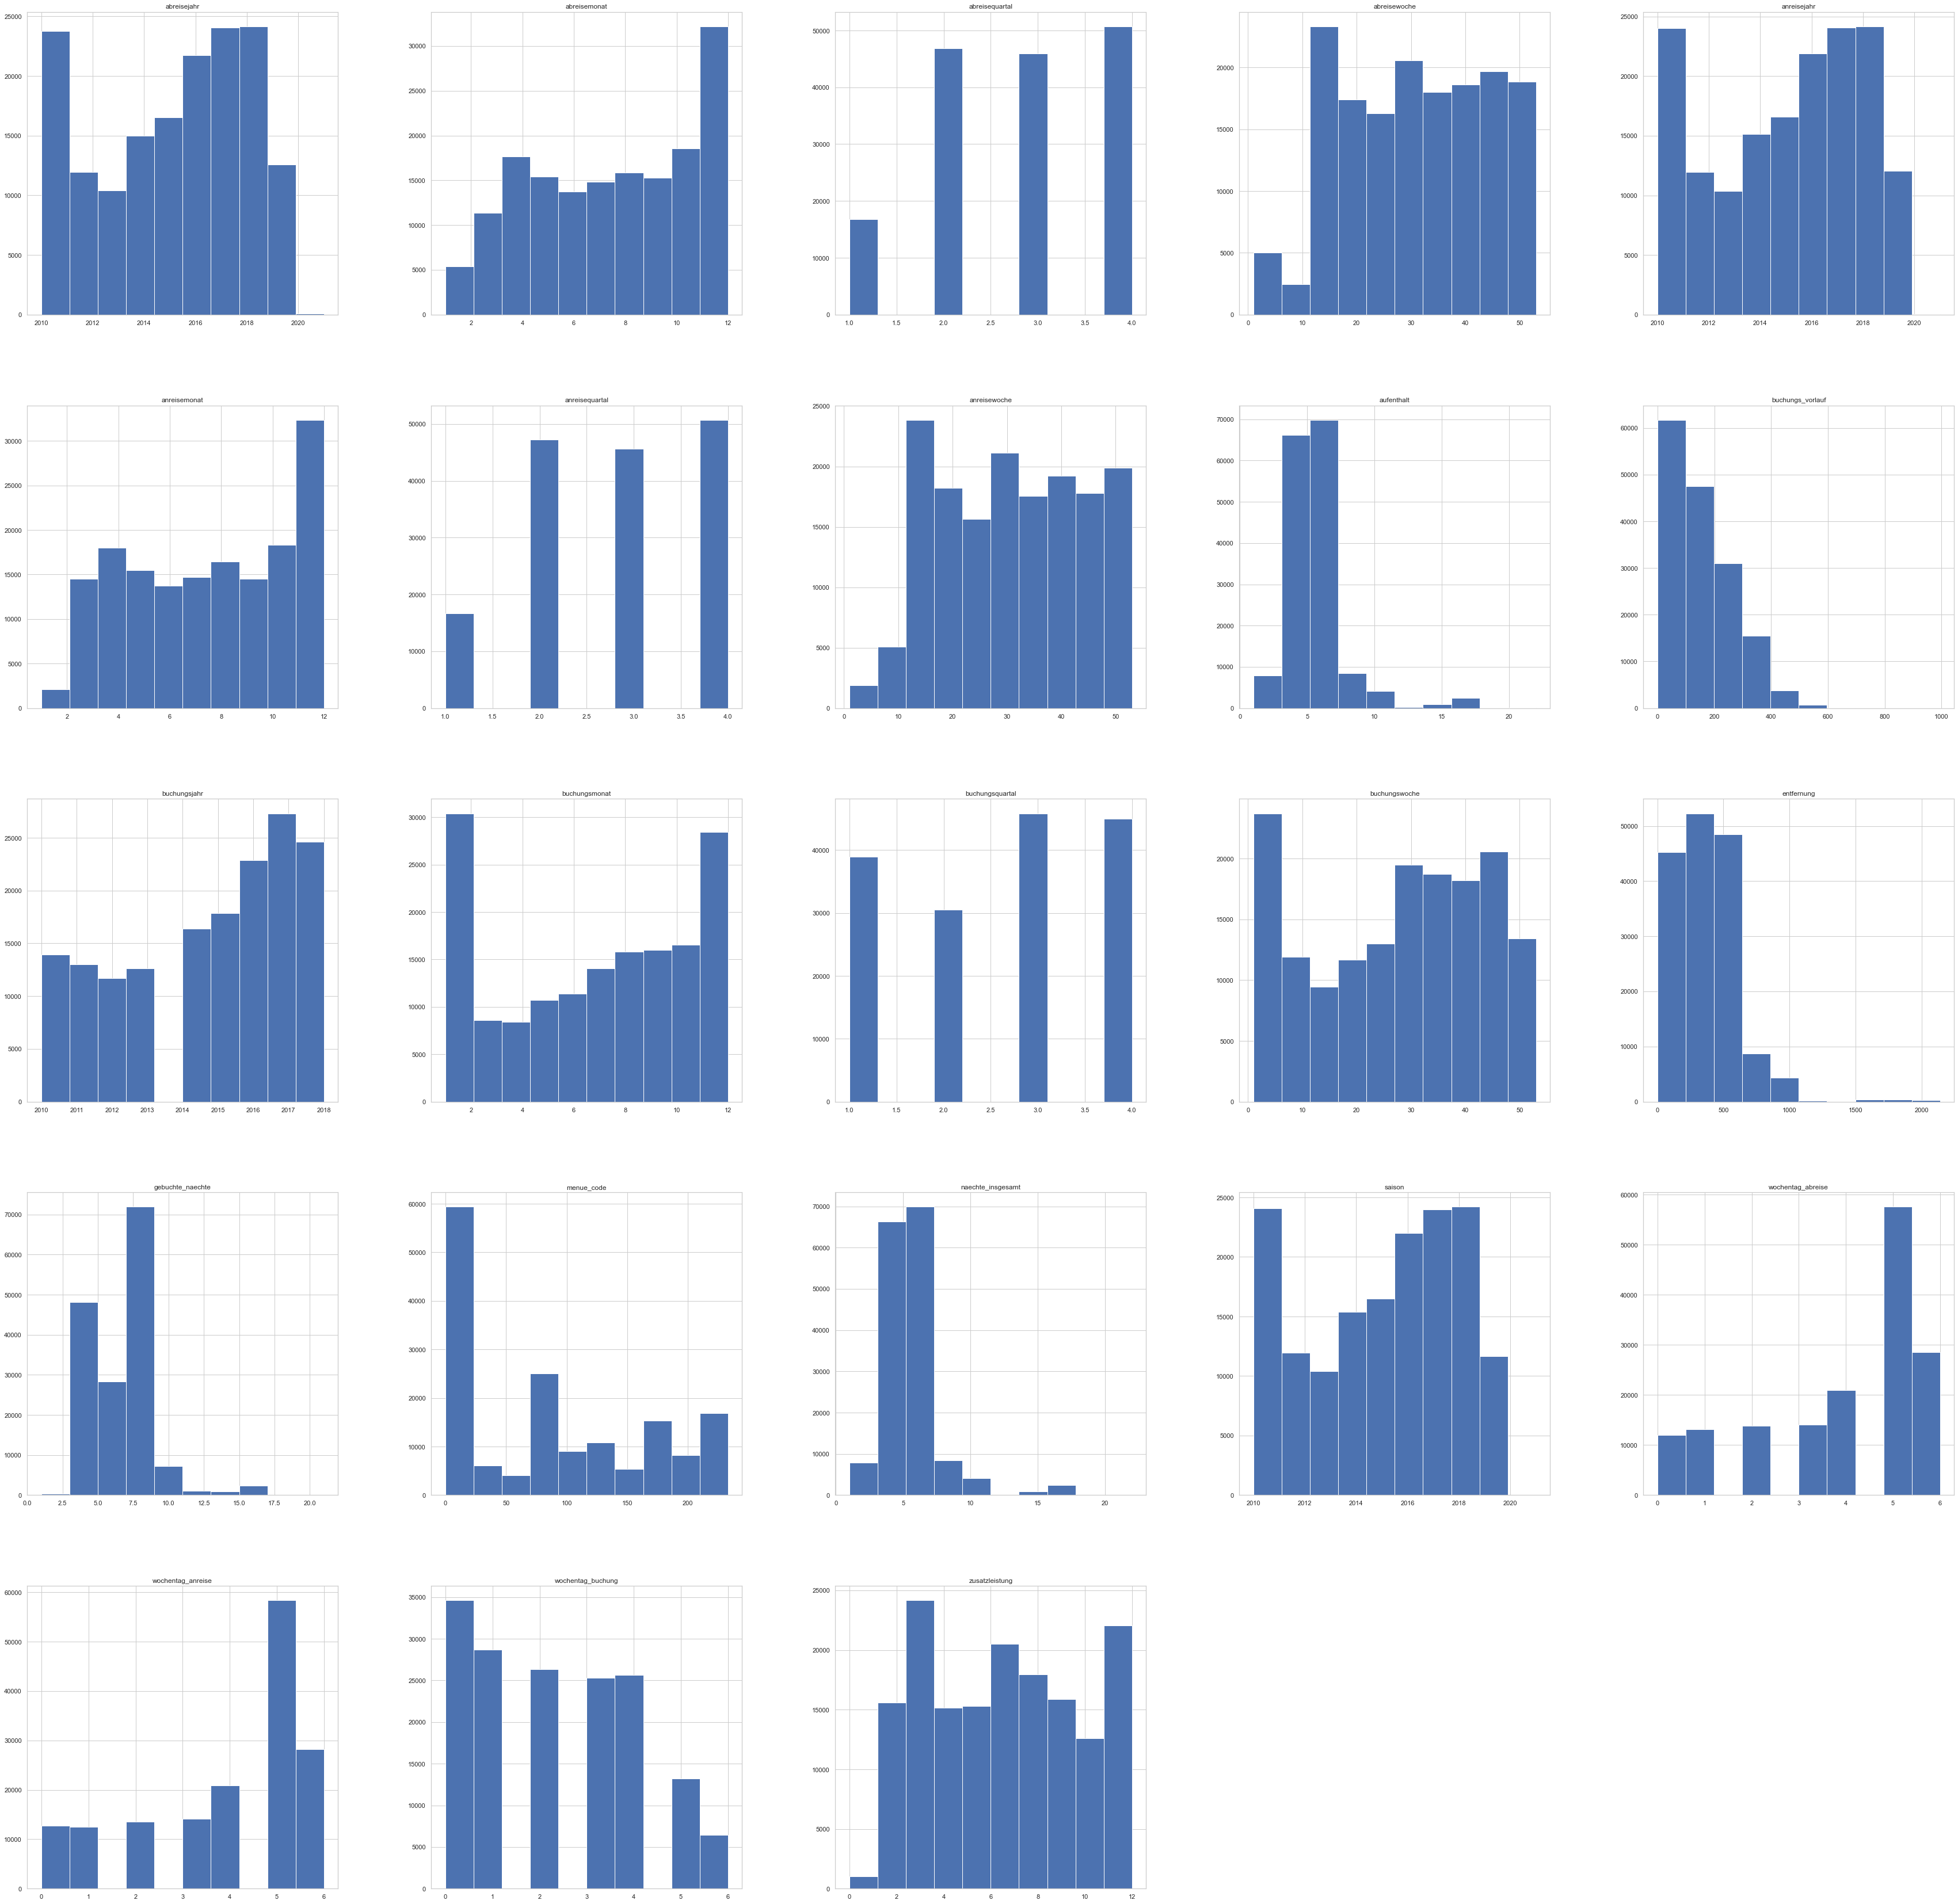

In [55]:
column_list = ["naechte_insgesamt", "gebuchte_naechte", "saison", "zimmerarten", "entfernung", 
               "menue_code", "zusatzleistung", "wochentag_buchung", "buchungsmonat",
               "buchungsjahr", "buchungswoche", "buchungsquartal","wochentag_anreise", 
               "anreisemonat", "anreisejahr", "anreisewoche", "anreisequartal", "wochentag_abreise",
               "abreisemonat", "abreisejahr", "abreisewoche", "abreisequartal", "aufenthalt", "buchungs_vorlauf"]

tmp = df[column_list].copy()
tmp.hist(figsize=(60,60));

#### Conclusions:
- main arrival and depature day is saturday, should be checked if similar for each destination
- december seems to be high season, january very few arrivals, maybe due to long december bookings

### Scatterplots
Price per night and total amount

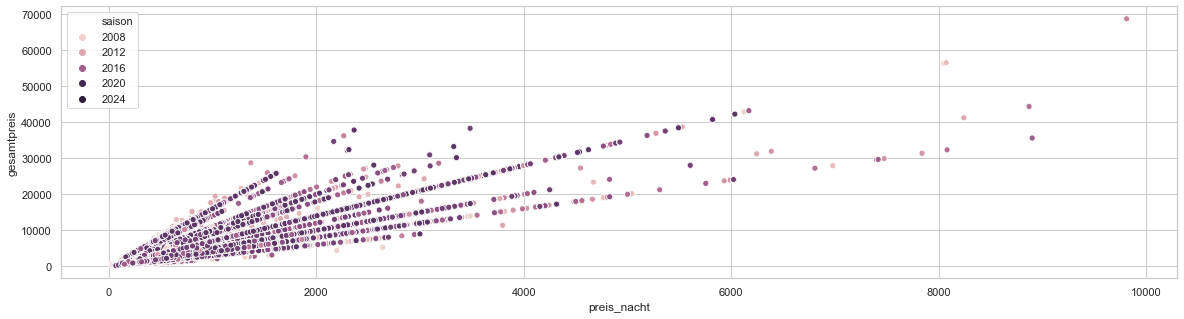

In [56]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="preis_nacht", y="gesamtpreis", hue="saison", data=df)

Price per person and total amount

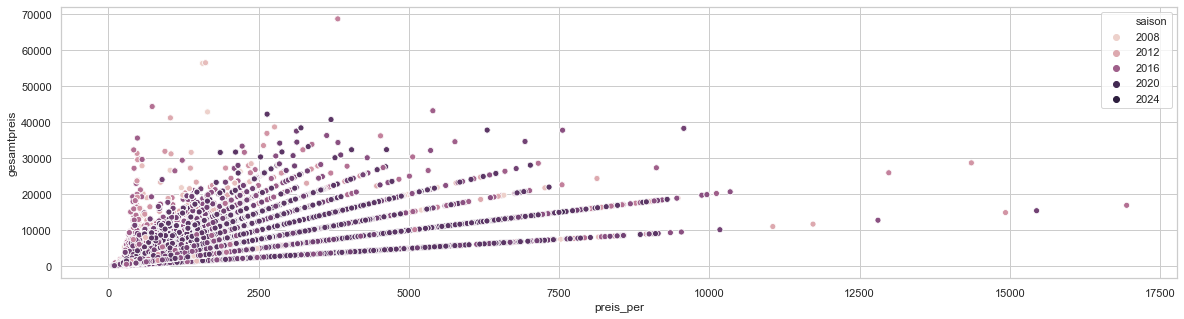

In [57]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="preis_per", y="gesamtpreis", hue="saison", data=df)

Arrival and departure date

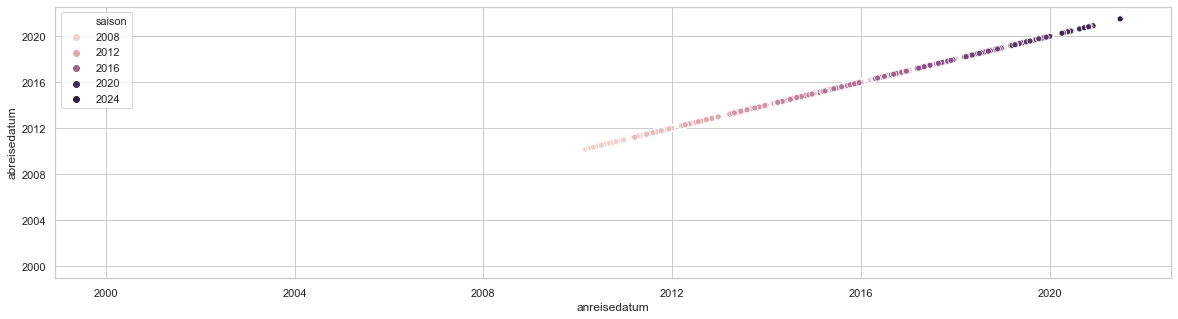

In [58]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="anreisedatum", y="abreisedatum", hue="saison", data=df)

Duration of stay and bookingrows

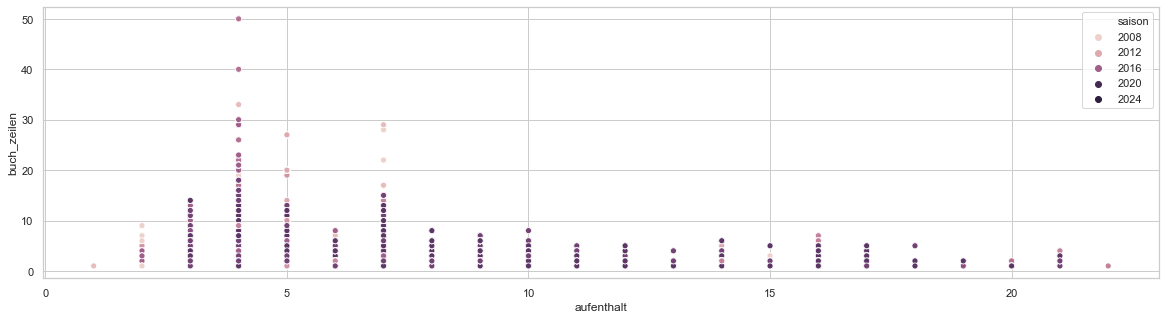

In [59]:
plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="aufenthalt", y="buch_zeilen", hue="saison", data=df)

### Heatmap (correlogram)

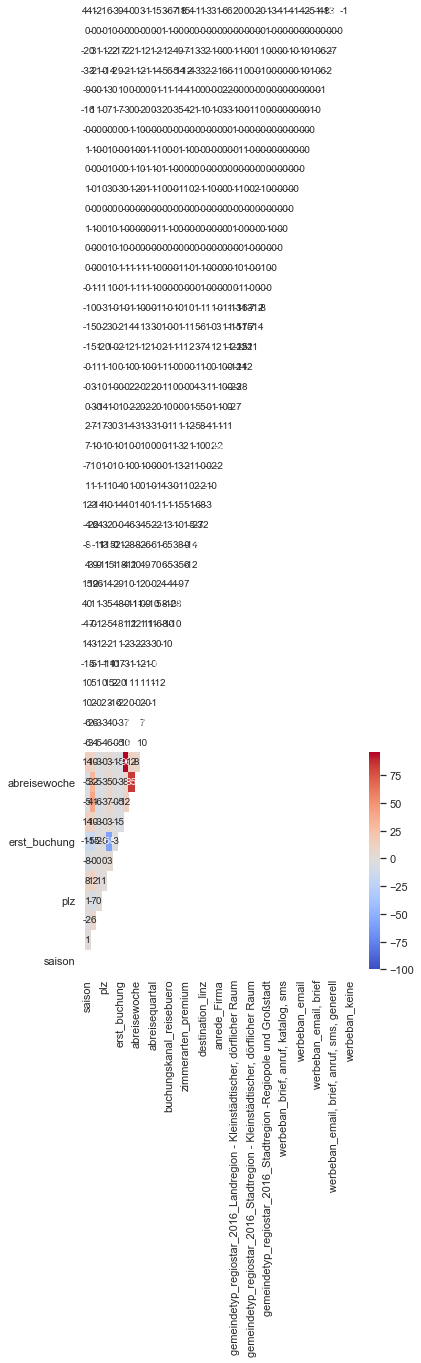

In [65]:
col_list = ["saison", "buchungskanal", "zimmerarten", 
            "menue_code", "zusatzleistung", "destination", "anrede", "plz", "kundenclub", 
            "sprache_deutsch", "erst_buchung", 
            "gemeindetyp_regiostar_2016","werbeban", "buchungswoche", "anreisewoche", "abreisewoche",
            "buchungsquartal", "anreisequartal", "abreisequartal"]

X_dum=pd.get_dummies(df[col_list].copy())
mask = np.triu(X_dum.corr())
ax = sns.heatmap(round(X_dum.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,11))
plt.savefig('img/correlogram.png')

In [ ]:
"reise_adventure", "reise_relax", "reise_standard", "reise_genuss", "kind", "zahler",
"bundesland", "jahrgangsalter_klassiert", 


# Modelling

## Logistic Regression
### Dummy Variable

In [66]:
aenderung = { 0: "Montag",
              1: "Dienstag",
              2: "Mittwoch",
              3: "Donnerstag",
              4: "Freitag",
              5: "Samstag",
              6: "Sonntag"
            }

df.wochentag_buchung.replace(aenderung, inplace=True)
df.wochentag_anreise.replace(aenderung, inplace=True)
df.wochentag_abreise.replace(aenderung, inplace=True)

In [67]:
df = pd.get_dummies(df, columns=["zimmerarten", "saison", "destination", "menue_code", "zusatzleistung", "anrede", "wochentag_buchung", "wochentag_anreise", "wochentag_abreise", "buchungswoche", "anreisewoche", "abreisewoche", "buchungsquartal", "anreisequartal", "abreisequartal"] )
#, dummy_na=True , dtype=np.bool)
# dummy_na brauche ich nur wenn ich Anrede nicht umwandel, dann für zimmerarten & destination droppen, 
# aktuell erste spalte beigehalten

### Train-Test-Split

In [73]:
column_X = list(df.columns)
column_X.remove('buchungsdatum')
column_X.remove('anreisedatum')
column_X.remove('abreisedatum')
column_X.remove('ort')
column_X.remove('repeater')
column_X.remove('folgebuchung')
column_X.remove('erstbuchung')
X = df[column_X]
y = df.folgebuchung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1337)

ValueError: list.remove(x): x not in list

In [74]:
column_X

['naechte_insgesamt',
 'gebuchte_naechte',
 'personen_anzahl',
 'gesamtpreis',
 'buchung_telefon',
 'buchung_online',
 'buchung_reisebuero',
 'reise_adventure',
 'reise_relax',
 'reise_standard',
 'reise_genuss',
 'kind',
 'entfernung',
 'zahler',
 'kunden_id',
 'buchungsnr',
 'buchungsnr_reisebuero',
 'plz',
 'kein_email_ad',
 'kein_brief_ad',
 'kein_anruf_ad',
 'kein_katalog_ad',
 'kein_sms_ad',
 'keine_werbung',
 'kundenclub',
 'sprache_deutsch',
 'jahrgangsalter_klassiert',
 'bundesland',
 'einwohner_adjusted_plz',
 'bev_m_plz',
 'bev_w_plz',
 'bev_insgesamt_ort',
 'bev_weiblich_ort',
 'bev_maennlich_ort',
 'qkm_plz',
 'flaeche_ort',
 'einwohnerdichte_prokm2_plz',
 'haushalte_regiog_2017_plz',
 'kaufkraft_einwohner_in_eur_regio',
 'kk_einwohner_index_regiog_2017',
 'kk_hh_index_regiog_2017',
 'gemeindetyp_regiostar_2016',
 'wirtschaftskraftmr1',
 'wirtschaftskraftmr2',
 'buchungstag',
 'buchungsmonat',
 'buchungsjahr',
 'anreisetag',
 'anreisemonat',
 'anreisejahr',
 'abreisetag',


In [71]:
for entry in df.columns:
    print(entry)

buchungsdatum
anreisedatum
abreisedatum
naechte_insgesamt
gebuchte_naechte
personen_anzahl
gesamtpreis
buchung_telefon
buchung_online
buchung_reisebuero
reise_adventure
reise_relax
reise_standard
reise_genuss
kind
entfernung
zahler
kunden_id
buchungsnr
buchungsnr_reisebuero
plz
ort
kein_email_ad
kein_brief_ad
kein_anruf_ad
kein_katalog_ad
kein_sms_ad
keine_werbung
kundenclub
sprache_deutsch
jahrgangsalter_klassiert
bundesland
einwohner_adjusted_plz
bev_m_plz
bev_w_plz
bev_insgesamt_ort
bev_weiblich_ort
bev_maennlich_ort
qkm_plz
flaeche_ort
einwohnerdichte_prokm2_plz
haushalte_regiog_2017_plz
kaufkraft_einwohner_in_eur_regio
kk_einwohner_index_regiog_2017
kk_hh_index_regiog_2017
gemeindetyp_regiostar_2016
wirtschaftskraftmr1
wirtschaftskraftmr2
buchungstag
buchungsmonat
buchungsjahr
anreisetag
anreisemonat
anreisejahr
abreisetag
abreisemonat
abreisejahr
buchungskanal
werbeban
aufenthalt
naechte_ausserhalb
buchungs_vorlauf
preis_per
preis_nacht
preis_nacht_per
buch_zeilen
erst_buchung
fo

#### Create Logistic Regression

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

### Confusion Matrix

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))